In [13]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, T5EncoderModel, GPT2Tokenizer, AutoModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("/home/profniggastein/PycharmProjects/embeddingstudy/EmbeddingContextData_with_TypeIII .csv")


model_name = "Salesforce/codet5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5EncoderModel.from_pretrained(model_name)


In [15]:
def embed_code(snippet):
    tokens = tokenizer(snippet, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state[:, 0, :].squeeze().numpy()

In [16]:
df["Embedding"] = df["Code"].apply(embed_code)
df

,ID,Functionality,Naming_Convention,Code,Colour,Embedding
0,ADD-ADD,ADD,ADD,"int add(int a, int b) {\n return a + b;\n}",Red,"[0.06946413, -0.3046961, -0.17122172, -0.03571..."
1,FLOOP-FLOOP,FLOOP,FLOOP,int sum_to_n(int n) {\n int sum = 0;\n f...,Yellow,"[-0.06813759, -0.3020846, -0.16806446, 0.02310..."
2,WLOOP-WLOOP,WLOOP,WLOOP,void count_down(int n) {\n while (n > 0) {\...,Green,"[-0.055835202, -0.120428406, -0.14055301, 0.01..."
3,FIB-FIB,FIB,FIB,int fibonacci(int n) {\n if (n <= 1) return...,Blue,"[-0.10450833, -0.19613402, -0.13835256, 0.0672..."
4,PRIME-PRIME,PRIME,PRIME,int is_prime(int n) {\n if (n <= 1) return ...,Orange,"[-0.03744073, -0.30835772, -0.15815203, 0.0124..."
...,...,...,...,...,...,...
84,MALLOC-WLOOP-T3,MALLOC,WLOOP,"int* count_down(int n) {\n printf(""Debug st...",deepskyblue,"[-0.10480521, -0.23672457, -0.13536987, -0.028..."
85,MALLOC-FIB-T3,MALLOC,FIB,"int* fibonacci(int n) {\n printf(""Debug sta...",deepskyblue,"[-0.1180822, -0.28685647, -0.12734595, -0.0298..."
86,MALLOC-PRIME-T3,MALLOC,PRIME,"int* is_prime(int n) {\n printf(""Debug star...",deepskyblue,"[-0.10173158, -0.26345548, -0.13499932, -0.020..."
87,MALLOC-FACT-T3,MALLOC,FACT,"int* factorial(int n) {\n printf(""Debug sta...",deepskyblue,"[-0.15727948, -0.27231517, -0.12181391, -0.032..."


In [17]:

def project_embeddingsTSNE():
    embedding_matrix = np.stack(df["Embedding"].values)


    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_embeddings = tsne.fit_transform(embedding_matrix)

    plt.figure(figsize=(20, 10))
    for idx, (x, y) in enumerate(reduced_embeddings):
        color = df["Colour"].iloc[idx]
        label = df["ID"].iloc[idx]
        plt.scatter(x, y, color=color, label=color if not label in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x + 0.5, y, label, fontsize=8)

    plt.title("t-SNE Projectionof Code Embeddings with type III Clones")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.savefig("t-SNE Projection of Code Embeddings Type III.pdf")
    plt.show()

def project_embeddingsPCA():
    from sklearn.decomposition import PCA
    embedding_matrix = np.stack(df["Embedding"].values)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embedding_matrix)

    plt.figure(figsize=(12, 10))
    for idx, (x, y) in enumerate(reduced_embeddings):
        color = df["Colour"].iloc[idx]
        label = df["ID"].iloc[idx]
        plt.scatter(x, y, color=color, label=color if not label in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x + 0.5, y, label, fontsize=8)

    plt.title("PCA Projection of Code Embeddings with type III Clones")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.savefig("PCA Projection of Code Embeddings Type III.pdf")
    plt.show()



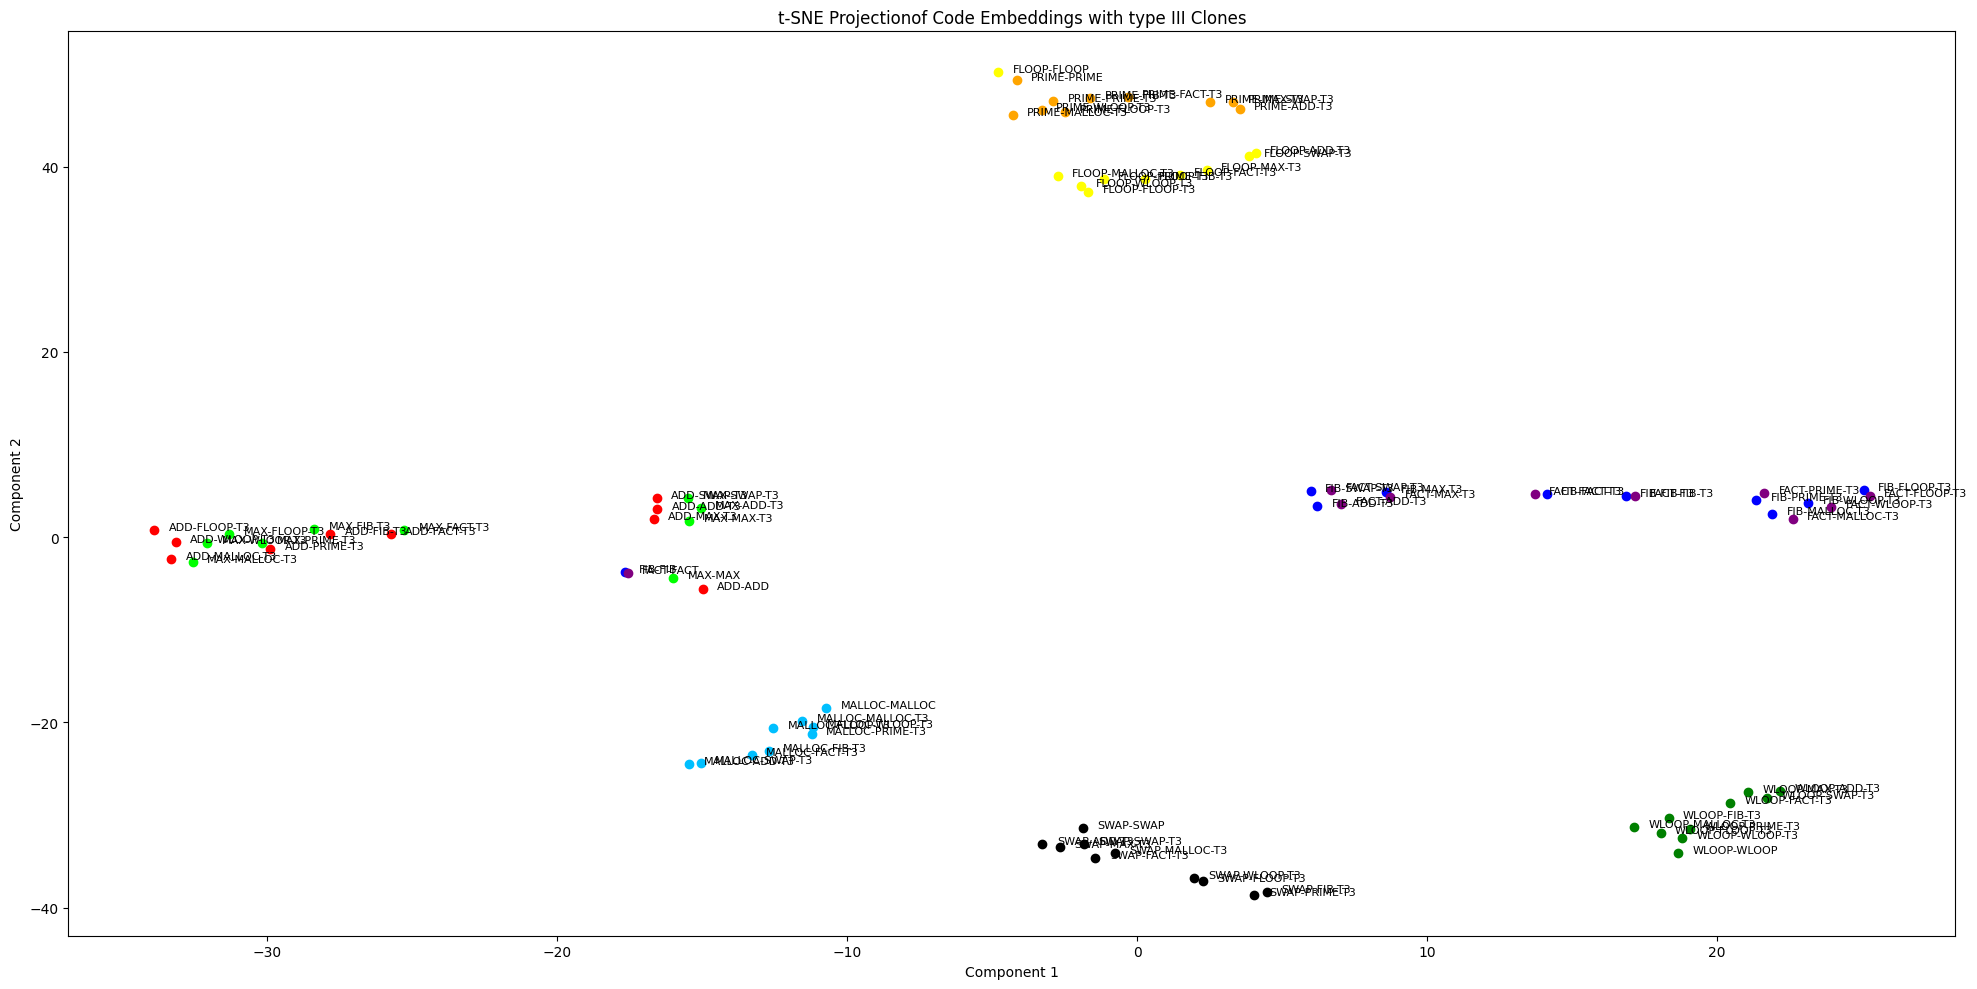

In [18]:
project_embeddingsTSNE()


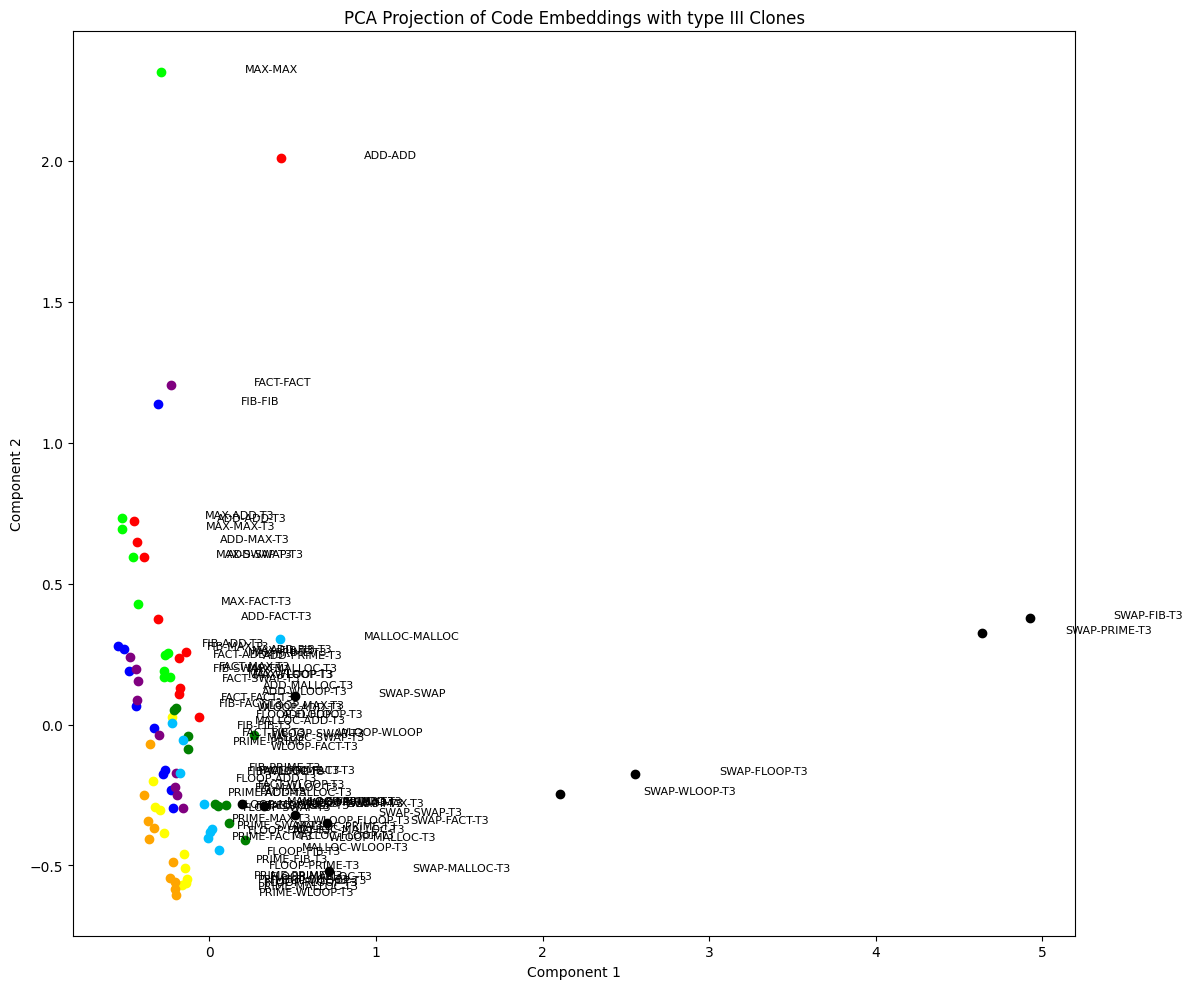

In [19]:
project_embeddingsPCA()

In [20]:
# embedding_matrix = np.stack(df["Embedding"].values)
# tsne = TSNE(n_components=2, random_state=42, perplexity=5)
# reduced_embeddings = tsne.fit_transform(embedding_matrix)
# plt.figure(figsize=(12, 10))
# for idx, (x, y) in enumerate(reduced_embeddings):
#     color = df["Colour"].iloc[idx]
#     label = df["ID"].iloc[idx]
#     plt.scatter(x, y, color=color, label=color if not label in plt.gca().get_legend_handles_labels()[1] else "")
#     plt.text(x + 0.5, y, label, fontsize=8)
#
# plt.title("t-SNE Projection of Code Embeddings")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.tight_layout()
# plt.show()